We assume Schwartzschild metric:
$$ ds^2 = g_{\mu \nu}dx^\mu dx^\nu = -\left(1-\frac{R}{R_S}\right)^{-1}dt^2 + \left(1-\frac{R}{R_S}\right)dr^2 + r^2 d\Omega^2$$
where $R_s = \frac{2GM}{c^2}$ is the Schwartzschild radius.



In [2]:
import math as m
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Radial Geodesics

$r=R_S$ defines \textit{event horizon}. Let us compute the radial geodesics of photons. It is given by the conditions $ds^2=0$ (light-like) and $d\theta=d\phi=0$ (radial), which means: $$ \frac{1}{c} \frac{dr}{dt} = \pm \left| 1 - \frac{R_S}{r}\right|.$$

In the figure below, the $+$ sign corresponds to thick lines while $-$ corresponds to the dashed lines.

/home/jaafar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]
/home/jaafar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in log
  del sys.path[0]
/home/jaafar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in less
/home/jaafar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()
/home/jaafar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in log
  app.launch_new_instance()
/home/jaafar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in less
/home/jaafar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in log
/home/jaafar/anaconda

Text(0, 0.5, 'Time $(t - t_0)c/ (R_S)$')

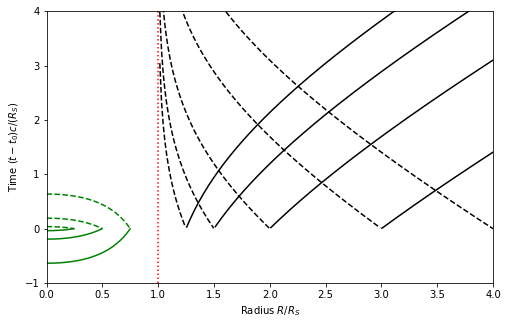

In [5]:
G = 6.673e-11 #m3 kg-1 s-2
c = 299792458 # m s-1
Msun = 1.99e30 #kg
rS = 2*G*Msun/(c**2)

r0 = 0.75*rS
t0 = 0 
tf = 200

## r > rS

def t_rsuprS1(r, r0):
    return (t0 + 1./c * (r - r0 + rS * np.log((r-rS)/(r0-rS))))

def t_rsuprS2(r, r0):
    return (t0 + 1./c * (r0 - r - rS * np.log((r-rS)/(r0-rS))))



## r < rS

def t_rinfrS1(r, r0):
    return (t0 + 1./c * (r0 - r - rS * np.log((rS-r)/(rS-r0))))

def t_rinfrS2(r, r0):
    return (t0 + 1./c * (r - r0 + rS * np.log((rS-r)/(rS-r0))))



### Plot

def plot_1_curve(r0):
    n = 200
    Rsup = np.linspace(1,4,n)
    Rinf = np.linspace(0,1,n)

    t1 = [((t_rsuprS1(r*rS, r0) - t0)/(rS/c)) for r in Rsup]
    t1 = np.ma.array(t1) #prepare for masking arrays - 'conventional' arrays won't do it
    t1_masked = np.ma.masked_where(t1 < 0 , t1) #mask values below 0

    t2 = [((t_rsuprS2(r*rS, r0) - t0)/(rS/c)) for r in Rsup]
    t2 = np.ma.array(t2)
    t2_masked = np.ma.masked_where(t2 < 0 , t2)


    t3 = [((t_rinfrS1(r*rS, r0) - t0)/(rS/c)) for r in Rinf]
    t3 = np.ma.array(t3)

    t4 = [((t_rinfrS2(r*rS, r0) - t0)/(rS/c)) for r in Rinf]
    t4 = np.ma.array(t4)

    t3_masked = np.ma.masked_where(t3 > t4 , t3)
    t4_masked = np.ma.masked_where(t4 < t3 , t4)

    if (r0 > rS):
        plt.plot(Rsup, t1_masked, color = 'black')
        plt.plot(Rsup, t2_masked, color = 'black', linestyle='dashed')

    else:
        plt.plot(Rinf, t3_masked, color = 'green')
        plt.plot(Rinf, t4_masked, color = 'green', linestyle='dashed')

r0_list = [0.25 *rS, 0.5*rS, 0.75*rS, 1.25*rS, 1.5*rS, 2*rS, 3*rS, 4*rS]

plt.figure(figsize=(8,5))

for i in range (len(r0_list)):
    plot_1_curve(r0_list[i])

plt.plot([1,1],[-1,4],"r:")
plt.ylim(-1,4)
plt.xlim(0,4)
plt.xlabel(r"Radius $r / R_S$")
plt.ylabel(r"Time $(t - t_0)c/R_S$")


Outside the horizon (black lines), the photons have two types of possible trajectories. They can escape the BH (thick lines), or fall into it in an infinite time.

Inside the horizon (green lines), the photon can no longer escape the horizon.

# Freefall of a massive particle into the BH

By integrating the equations of motion of a massive particle in Schwartzschild spacetime, we obtain an effective potential:
$$V(r) = \frac{1}{2} \left[ \left( 1 - \frac{R_S}{r} \right) \left( c^2 + \frac{l^2}{r^2} \right) - c^2 \right].$$

We orient the coordinates so that we initially have $\theta = \frac{\pi}{2}$ and $u_\theta=0$. The particle has a planar movement contained in the plane $\theta = \frac{\pi}{2}$ and it is determined by the equation of $r$ as a function of the proper time $\tau$:
$$ \frac{1}{2}\left( \frac{dr}{d\tau}\right)^2 + V(r) = \frac{1}{2}\left( \frac{e^2}{c^2} - c^2 \right).$$

$e$ and $l$ are two first integrals of the motion: 
$$\left( 1 - \frac{R_S}{r}\right)\frac{dt}{d\tau} = \frac{e}{c^2} $$
$$r^2 \frac{d\phi}{d\tau}= l.$$ 

These equations can be integrated just like in classical mechanics. 

(0, 6)

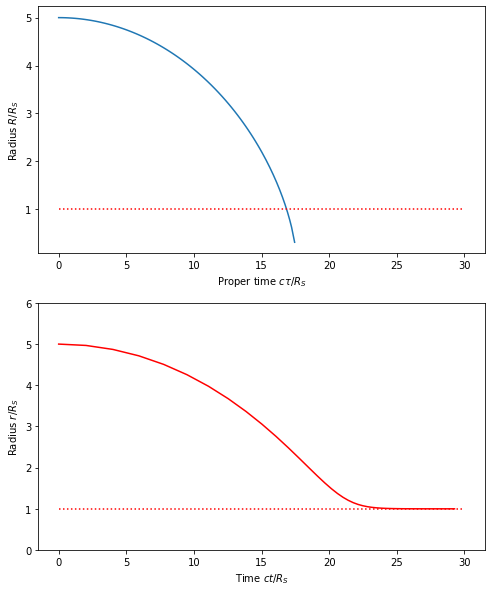

In [9]:
from numpy import sqrt,pi
r0 = 5
n = 40
eps = 0.3

def tau(r):
    return r0*sqrt(r0)*(pi/2 - np.arcsin(sqrt(r/r0)) + sqrt(r/r0)*sqrt(1-r/r0))

global R
R = []

def aux(r1,r2,eps):
    if(tau(r2)-tau(r1)>eps):
        aux(r1,(r1+r2)/2,eps)
        aux((r1+r2)/2,r2,eps)
    else:
        R.append(r1)

aux(5,0,eps)

plt.figure(figsize=(8, 10))

plt.subplot(211)
tau = [tau(r) for r in R]
plt.plot(tau,R)
plt.plot([0,30],[1,1],"r:")
plt.xlabel(r"Proper time $c\tau /R_S$")
plt.ylabel(r"Radius $R / R_S$")



plt.subplot(212)
R1 = np.linspace(0,5,n)
R2 = 1 + (r0-1)*np.exp(-(R1*R1)/2)
tau = r0*sqrt(r0)*(pi/2 - np.arcsin(sqrt(R2/r0)) + sqrt(R2/r0)*sqrt(1-R2/r0))
t = np.zeros(n)
for i in range(n-1):
    t[i+1]=t[i]+(tau[i+1]-tau[i])*sqrt(1-1/r0)/(1-1/R2[i])
plt.plot(t,R2,color="r")
plt.plot([0,30],[1,1],"r:")
plt.xlabel(r"Time $ct /R_S$")
plt.ylabel(r"Radius $r / R_S$")
plt.ylim(0,6)



The figures above shows the evolution of the radius of a massive particle initially at $r=5R_S$ without initial velocity as a function of the time (down) and the proper time (up). For a static observator at infinity, the freefalling particle approaches the BH without ever crossing the event horizon, while nothing in particular happens in its proper frame. 

# Motion of a massive particle in the spacetime of a Schwarzschild black hole

The previous equations of motion can be numerically integrated using a fourth-order Runge-Kutta scheme. We can plot the movement of a massive particle with different initial conditions and distinguish different regimes. The initial conditions can be set either by the initial position $(x, y)$ and velocity $(v_x, v_y)$, or equivalently the initial position, the energy $e$ and the momentum $l$ (both conserved).

For an initial position given by $r_0>R_S$ and an energy, which always verifies $ \frac{1}{2}\left( \frac{e^2}{c^4} -1 \right) \geq \frac{V(r_0)}{c^2}$, there are three different regimes:\\
-  $0<l/(R_Sc)<\sqrt 3$: the particle falls into the BH after eventually passing by an apoastron.
-  $\sqrt 3<l/(R_Sc)<2$: the particle orbits around the BH, passing by apoastrons and periastrons as in the precession of Mercury perihelion.
-  $2<l/(R_Sc)<$: the particle goes to infinity, after eventually passing by an apostron.

'\n\nverif_l = [r[j]**2 * (phi[j+1] - phi[j])/h for j in range(i)]\nverif_e = [dr[j]**2 + (1 - 1/r[j])*(1 + l**2/r[j]**2) for j in range(i)]\n            \nT = range(i)\n\n\nplt.subplot(212)\nplt.plot(T, verif_e, "-b", T, verif_l, "-r")\n'

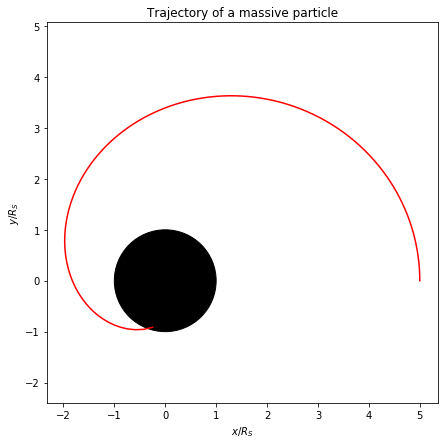

In [11]:
h = 0.1 # time step
tau_f = 80 # final time
rl = 1 # limit radius (to stop integration)
#E = -0.04
#r0 = 1.2
x = [5,0] # initial position
v = [0,0.3] # initial velocity

#r, tau, e, l are in units of respectively Rs, Rs/c, c^2, c*Rs

# polar coordinates

r0 = m.sqrt(x[0]*x[0] + x[1]*x[1])
phi0 = np.arctan2(x[1], x[0])
u_r = v[0]*np.cos(phi0)+v[1]*np.sin(phi0)
u_phi = -v[0]*np.sin(phi0)+v[1]*np.cos(phi0)

# first integrals of motion

e = np.sqrt(u_r*u_r + (1-1/r0)*(1+u_phi*u_phi))
l = r0*u_phi

#e = 2*np.sqrt(2)/3
#l = np.sqrt(3)


#e, l = np.sqrt(2 * E + 1), 1.86

E = (e*e - 1)/2

V = lambda r : .5 * ((1 - 1/r) * (1 + l**2/r**2) - 1) #effective potential

#E = V(r00) + .5 * dr0^2

#dr0 = np.sqrt(2 * (E - V(r0)))


f = lambda r : np.array([- 1 / (2*r[1]**2) + (l**2) / (r[1]**3) - (3*l**2) / (2*r[1]**4), r[0], l / (r[1]*r[1])]) #argument written as [r', r, phi]




# 4th order Runge-Kutta integration of r'' = -dV/dr ; phi' = l / r^2

n = int(tau_f / h)

r = np.zeros(n)
r[0]=r0
dr = np.zeros(n)
dr[0]= u_r #np.sqrt(2 * (E - V(r0))) #u_r
phi = np.zeros(n)
phi[0]=phi0

i=0
while(r[i] > rl and i<n-1):
    a = np.array([dr[i],r[i],phi[i]])
    a1 = f(a) * h
    a2 = f(a + a1) * h
    a3 = f(a + a2/2) * h
    a4 = f(a + a3) * h
  
    a = a + (a1 + 2 * (a2 + a3) + a4)/6
  
    dr[i+1] = a[0]
    r[i+1] = a[1]
    phi[i+1] = a[2]
  
    i+=1

# Solve V(rmax) = E

Vm = lambda r : V(r) - E

r1 = 0.01
r2 = 3

while np.abs(r1-r2) > rl :
    rm = (r1 + r2) / 2
    if Vm(r1) * Vm(rm) < 0:
        r2 = rm
    else:
        r1 = rm

rm = 10
    
# plot


X = [r[j]*np.cos(phi[j]) for j in range(i+1)]
Y = [r[j]*np.sin(phi[j]) for j in range(i+1)]

t = 50
#Xm = [rm*np.cos(2*j*np.pi/t) for j in range(t)]
#Ym = [rm*np.sin(2*j*np.pi/t) for j in range(t)]


circle = plt.Circle((0,0),1,color='k')

fig, ax = plt.subplots(figsize=(7, 7)) 
ax.add_artist(circle)
plt.ylim((-rm*1.2, rm*1.2))
plt.xlim((-rm*1.2, rm*1.2))
plt.plot(X,Y,'r')
#,Xm,Ym,'b.')
plt.xlabel(r"$x/R_S$")
plt.ylabel(r"$y/R_S$")
plt.title("Trajectory of a massive particle")

plt.axis("equal")

#Movement constants verification

'''

verif_l = [r[j]**2 * (phi[j+1] - phi[j])/h for j in range(i)]
verif_e = [dr[j]**2 + (1 - 1/r[j])*(1 + l**2/r[j]**2) for j in range(i)]
            
T = range(i)


plt.subplot(212)
plt.plot(T, verif_e, "-b", T, verif_l, "-r")
'''


#  Trajectory of photons arriving from infinity

For photons, similar equations can be derived, by replacing the proper time by a parameter $\lambda$. The effective potential is:
$$ V(r) = c^2 \left(\frac{R_S}{r} \right)^2 \left(1 - \frac{R_S}{r} \right), $$
and the equations of motion are:

$$\left( 1 - \frac{R_S}{r}\right)\frac{dt}{d\lambda} = \frac{R_S}{b}, $$

$$r^2 \frac{d\phi}{d\lambda}= R_S c, $$

$$ \left( \frac{dr}{d\lambda}\right)^2 + V(r) = \left( \frac{R_S}{b}\right)^2 c^2.$$

$b$ is an impact parameter.



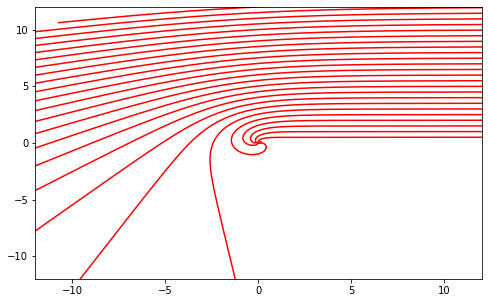

In [13]:
h = 0.01
lambda_f = 500
rl = 0.2 
bm = 13 #maximum impact parameter
s = .5 #step of impact parameters
B = np.arange(s, bm, s) # list of impact parameters

x0 = 30 #photon coming from infinity

g = lambda r : np.array([1 / r[1]**3 - 3 / (2 * r[1]**4), r[0], 1 / (r[1]*r[1])]) #argument written as [r', r, phi]

plt.figure(figsize=(8, 5))

for b in B :
    x = [x0, b]
    
    r0 = np.sqrt(x[0]*x[0] + x[1]*x[1])
    phi0 = np.arctan2(x[1], x[0])

    Vph = lambda r :  (1 / r**2) * (1 - 1 / r)  #effective potential
  
    dr0 = - np.sqrt(1 / b**2 - Vph(r0))

    #4th order Runge-Kutta integration of r'' = -.5*dVph/dr ; phi' = 1 / r^2
    
    n = int(lambda_f / h)
    r = np.zeros(n)
    r[0] = r0
    dr = np.zeros(n)
    dr[0] = dr0
    phi = np.zeros(n)
    phi[0] = phi0

    i=0
    
    while(r[i] > rl and i<n-1):

        a = np.array([dr[i],r[i],phi[i]])

        a1 = g(a) * h
        a2 = g(a + a1) * h
        a3 = g(a + a2/2) * h
        a4 = g(a + a3) * h

        a = a + (a1 + 2 * (a2 + a3) + a4)/6

        dr[i+1] = a[0]
        r[i+1] = a[1]
        phi[i+1] = a[2]

        i+=1

    # plot


    X = [r[j]*np.cos(phi[j]) for j in range(i+1)]
    Y = [r[j]*np.sin(phi[j]) for j in range(i+1)]


    # circle = plt.Circle((0,0),1,color='k')
    rm = 10

    plt.ylim((-rm*1.2, rm*1.2))
    plt.xlim((-rm*1.2, rm*1.2))
    plt.plot(X,Y,'r')



# Capture of photons around a Schwartzschild black hole

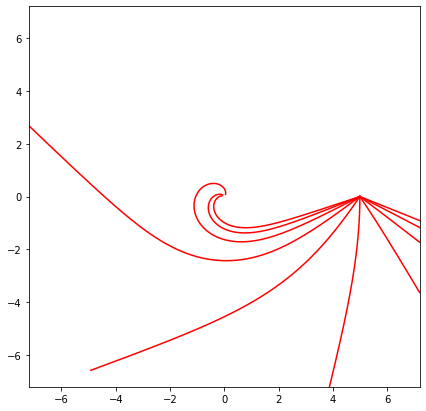

In [14]:
h = 0.001
lambda_f = 50
rl = 0.1 

x0 = 5 #photon source on the x-axis


r0 = x0
phi0 = 0

Vph = lambda r :  (1 / r**2) * (1 - 1 / r)  #effective potential

nbr = 10 #number of trajectories

DR0 = np.tanh(np.array([ -1 + j * 2 / nbr for j in range(nbr)])/(0.15 * nbr)) #random function to scatter discretization points such as to have a nice figure for x0 = 4 ^^

g2 = lambda r : np.array([1 / r[1]**3 - 3 / (2 * r[1]**4), r[0], -1 / (r[1]*r[1])]) #argument written as [r', r, phi]

plt.figure(figsize=(7, 7))

for dr0 in DR0:
  
    #4th order Runge-Kutta integration of r'' = -.5*dVph/dr ; phi' = 1 / r^2

    n = int(lambda_f / h)

    r = np.zeros(n)
    r[0] = r0
    dr = np.zeros(n)
    dr[0] = dr0
    phi = np.zeros(n)
    phi[0] = phi0

    i=0
    while(r[i] > rl and i<n-1):

        a = np.array([dr[i],r[i],phi[i]])

        a1 = g2(a) * h
        a2 = g2(a + a1) * h
        a3 = g2(a + a2/2) * h
        a4 = g2(a + a3) * h

        a = a + (a1 + 2 * (a2 + a3) + a4)/6

        dr[i+1] = a[0]
        r[i+1] = a[1]
        phi[i+1] = a[2]

        i+=1

  # plot
    
    X = [r[j]*np.cos(phi[j]) for j in range(i+1)]
    Y = [r[j]*np.sin(phi[j]) for j in range(i+1)]
    
    rm = 6

    plt.ylim((-rm*1.2, rm*1.2))
    plt.xlim((-rm*1.2, rm*1.2))
    plt.plot(X,Y,'r')

# Simulation of apparent sky

We model the sky as a sphere of a radius sufficiently larger than $R_S$, with punctual photon sources on the sphere as stars. We first start by a simulation in 2D, which will be easily generalized to a 3D simulation thanks to the planar motion of the photon. In particular, we benefit from different symmetries of the system to reduce the computations. Afterwards, we simulate the apparent sky for a freefalling observer into the BH by adding special relativity effect such as geometrical distortions and frequency shifts. 

target:  0.3141592653589793
target reached, apparent angle:  0.3691470274442942
target:  0.6283185307179586
target reached, apparent angle:  0.7064256347512204
target:  0.9424777960769379
target reached, apparent angle:  1.0004040024205283
target:  1.2566370614359172
target reached, apparent angle:  1.2541349087614884
target:  1.5707963267948966
target reached, apparent angle:  1.4756576443481622
target:  1.8849555921538759
target reached, apparent angle:  1.671524227100716
target:  2.199114857512855
target reached, apparent angle:  1.8446437956934145
target:  2.5132741228718345
target reached, apparent angle:  1.99448286377596
target:  2.827433388230814
target reached, apparent angle:  2.118927642222523
target:  3.141592653589793
target reached, apparent angle:  2.217195770227415
target:  3.455751918948772
target reached, apparent angle:  2.290984421734895
target:  3.7699111843077517
target reached, apparent angle:  2.3445501686443766
target:  4.084070449666731
target reached, apparen

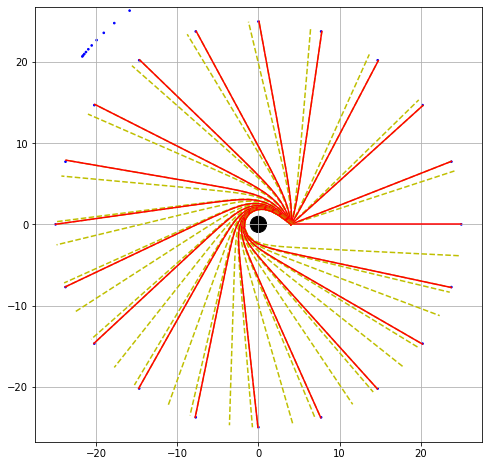

In [16]:
## Parameters
h = 0.1
e = 0.01
rl = 1 #limit radius for integration
R = 25 # sky radius
n = 20 # number of stars on the sky
x = [4,0] # coordinates of the observer
p=n+n//2 # numbers of geodesics

## Initialisation
Targets = [2*j*np.pi/n for j in range(n)] #stars (angular) locations

r0 = m.sqrt(x[0]*x[0] + x[1]*x[1])
phi0 = np.arctan2(x[1], x[0])

Vph = lambda r :  (1 / r**2) * (1 - 1 / r)  #effective potential
g2 = lambda r : np.array([1 / r[1]**3 - 3 / (2 * r[1]**4), r[0], 1 / (r[1]*r[1])]) #argument written as [r', r, phi]

fig, ax = plt.subplots(figsize=(8, 8))    
circle = plt.Circle((0,0),1,color='k')
ax.add_artist(circle)
for t in Targets:
    circle = plt.Circle((R*np.cos(t),R*np.sin(t)),0.1,color='b')
    ax.add_artist(circle)

## Find the "nearest left target"
if(phi0<0):
    phi0+=2*np.pi
k=0
if(0<phi0<=np.pi):
    k=0
    while(abs(Targets[k-1]-phi0)>2*m.pi/n):
        k+=1
elif(phi0>np.pi): 
    k = n//2+1
    while(abs(Targets[k-1]-phi0)>2*m.pi/n):
        k=(k+1)%n

##Loop variables 
theta = phi0 # shooting angle
dt = Targets[k]-phi0  # dtheta
i1 = phi0 # impact on the sky
i0 = 0 # previous impact
Thetas=[]

p=n

if(dt<e): # adjust radial alignment problem
    X=[r0*np.cos(phi0),R*np.cos(phi0)]
    Y=[r0*np.sin(phi0),R*np.sin(phi0)]
    plt.plot(X,Y,'r')
    Thetas.append(phi0)
    k+=1
    dt = Targets[k]-phi0
    p-=1

targets = [2*(j+k)*np.pi/n for j in range(p)] # adjust 0-2pi passage

## Loop

for target in targets:
    print("target: ", target)
    theta += dt

    while(abs(target-i1)>e):
        r = [r0]
        dr = [-(1/r[0])*np.tan(theta-np.pi/2-phi0)]
        phi = [phi0]

        i=0
        while(1.4<r[i]<R): # no need to continue if r<1.5 (last circular orbit around the BH)
            a = np.array([dr[i],r[i],phi[i]])
            a1 = g2(a) * h
            a2 = g2(a + a1) * h
            a3 = g2(a + a2/2) * h
            a4 = g2(a + a3) * h
            a = a + (a1 + 2 * (a2 + a3) + a4)/6
            dr.append(a[0])
            r.append(a[1])
            phi.append(a[2])
            i+=1
                
        if(r[i]>=R):
            i0 = i1
            i1 = (phi[i]*(R-r[i-1])-phi[i-1]*(R-r[i])) / (r[i]-r[i-1]) # average of the last two obtained phi
            dt = dt*(target-i1)/(i1-i0) 
            theta+=dt
                
        else: # geodesic falls into the BH
            dt = -abs(dt)/2
            theta += dt
        X = [r[j]*np.cos(phi[j]) for j in range(i+1)]
        Y = [r[j]*np.sin(phi[j]) for j in range(i+1)]
        plt.plot(X,Y,'y--')
        
    Thetas.append(theta)
    print("target reached, apparent angle: ",theta)
    if(len(Thetas)>1):
        dt = Thetas[-1]-Thetas[-2]
    else: 
        dt = 2*np.pi/n

    X = [r[j]*np.cos(phi[j]) for j in range(i+1)]
    Y = [r[j]*np.sin(phi[j]) for j in range(i+1)]
    plt.plot(X,Y,'r')

##Final Plot
for t in Thetas:
    circle = plt.Circle( ( (R+2*r0)*np.cos(t)+x[0] , (R+2*r0)*np.sin(t)+x[1] ),0.1,color='b' )
    ax.add_artist(circle)
        
plt.grid(1)
plt.axis("equal")
plt.show()

## Pre-computation

In [3]:
#The precision e is assessed on phi (impact on the sky) and not on theta (apparent position)

import math as m
import numpy as np
import matplotlib.pyplot as plt

##Parameters
h = 0.1
e = 1*np.pi/180 
R = 100 #sky radius
x = [7,0] #coordinates of the observer

##Initialisation
r0 = m.sqrt(x[0]*x[0] + x[1]*x[1])
phi0 = np.arctan2(x[1], x[0])

Vph = lambda r :  (1 / r**2) * (1 - 1 / r)  #effective potential
g2 = lambda r : np.array([1 / r[1]**3 - 3 / (2 * r[1]**4), r[0], 1 / (r[1]*r[1])]) #argument written as [r', r, phi]

##Find the "nearest left target"
def nearest_target(n,phi0):
    Targets = [2*j*np.pi/n for j in range(n)] #stars (angular) locations
    if(phi0<0):
        phi0+=2*np.pi
    k=0
    if(0<phi0<=np.pi):
        k=0
        while(abs(Targets[k-1]-phi0)>2*m.pi/n):
            k+=1
    elif(phi0>np.pi): 
        k = n//2+1
        while(abs(Targets[k-1]-phi0)>2*m.pi/n):
            k=(k+1)%n
    return(k)

## Auxiliary
def ecart_max(x_A,y_A,x_B,y_B,x_C,y_C,x_D,y_D):
    tau_AB = (y_B-y_A)/(x_B-x_A)
    tau_CD = (y_D-y_C)/(x_D-x_C)
    tau_BC = (y_C-y_B)/(x_C-x_B)
    tau_AC = (y_C-y_A)/(x_C-x_A)
    return (tau_CD-tau_BC)*(tau_AC-tau_AB)*(x_C-x_A)/(tau_CD-tau_AB)

def tir(h,theta): #shoots at an angle theta, returns the angular impact on the sky
    r = [r0]
    dr = [-(1/r[0])*np.tan(theta-np.pi/2-phi0)]
    phi = [phi0]
    i=0
    while(1.4<r[i]<R): 
        a = np.array([dr[i],r[i],phi[i]])
        a1 = g2(a) * h
        a2 = g2(a + a1) * h
        a3 = g2(a + a2/2) * h
        a4 = g2(a + a3) * h
        a = a + (a1 + 2 * (a2 + a3) + a4)/6
        dr.append(a[0])
        r.append(a[1])
        phi.append(a[2])
        i+=1

    if(r[i]>=R):
        impact = (phi[i]*(R-r[i-1])-phi[i-1]*(R-r[i])) / (r[i]-r[i-1]) 
        print("tir: ",impact)
        return(impact)
                
    else: 
        return("the geodesic is lost...")
        
        
def convergence(h,target,i0,i1,theta,dt): #imposes convergence to the target, returns theta
    while(abs(target-i1)>e):
        r = [r0]
        dr = [-(1/r[0])*np.tan(theta-np.pi/2-phi0)]
        phi = [phi0]

        i=0
        while(1.4<r[i]<R): # no need to continue if r<1.5 (last circular orbit around the BH)
            a = np.array([dr[i],r[i],phi[i]])
            a1 = g2(a) * h
            a2 = g2(a + a1) * h
            a3 = g2(a + a2/2) * h
            a4 = g2(a + a3) * h
            a = a + (a1 + 2 * (a2 + a3) + a4)/6
            dr.append(a[0])
            r.append(a[1])
            phi.append(a[2])
            i+=1
                
        if(r[i]>=R):
            i0 = i1
            i1 = (phi[i]*(R-r[i-1])-phi[i-1]*(R-r[i])) / (r[i]-r[i-1]) # average of the last two obtained phi
            if(i1>target+2*np.pi/n):
                 dt = -abs(dt)/2
            else:
                dt = dt*(target-i1)/(i1-i0) 
            theta+=dt
                
        else:  
            dt = -abs(dt)/2
            theta += dt
    return theta,i1
        
##Determine n
#determine the minimal n (number of points on the circle), so that we can directly deduce the apparent position of stars between 2 points at a precision better than e.
n = 40 #initial number of stars on the sky
k = nearest_target(n,phi0)
targets = [2*(k+n//2)*np.pi/n] #first target at pi/2
ecarts = [0,0]
dt = 0.1  
i1 = 1.4 
i0 = 0 
Thetas=[]
j=0

theta = 1.4   

while(ecarts[-1]-ecarts[-2]>=0):
    target = targets[-1]
    theta += dt

    (theta,impact) = convergence(h,target,i0,i1,theta, dt)
        
    Thetas.append(theta)
    if(len(Thetas)>1):
        dt = Thetas[-1]-Thetas[-2]
    else: 
        dt = 2*np.pi/n
    if(j>=3):
        ecarts.append(ecart_max(Thetas[j-3],targets[j-3],Thetas[j-2],targets[j-2],Thetas[j-1],targets[j-1],Thetas[j],targets[j]))
    j+=1
    targets.append(2*(k+n//2+j)*np.pi/n)


print(ecarts)

n = np.int(np.ceil(n*np.sqrt(2*ecarts[-2]/e)))
print("Le nombre de points sur le cercle sera :", n)


##Determine the step
Targets = [2*j*np.pi/n for j in range(n)]
Theta = phi0 #angle de tir
intervalle = 2
k = nearest_target(n,phi0)
dt = Targets[k]-phi0  #dt comme diminutif de d_theta
i1 = phi0 #impact sur le ciel
i0 = 0 #impact précédent
Thetas=[]
Steps=[]
pas1 = 1
pas2 = 0.8
p = (n//intervalle)+1

if(dt<e): #pour régler le problème de l'alignement radial
    Thetas.append(phi0)
    k+=1
    dt = Targets[k]-phi0

targets = [2*(intervalle*j+k)*np.pi/n for j in range(p)]

for i in range(p):
    target = targets[i]
    print("cible :", target)
    Theta += dt
    
    (theta,impact) = convergence(pas1,target,i0,i1,Theta,dt)        
    print("convergence pas grossier :",theta)
    
    #La convergence grossière, suivie de 2 tirs grossiers, permet de déduire le pas nécessaire pour être à moins de e/2 de la cible : c'est le pas "fin" h ci-dessous
    
    impact1 = tir(pas1,theta)
    impact2 = tir(pas2,theta)
    ecart = abs(impact2-impact1)
    D = ecart/((e/2)*(pas1/pas2-1))
    H = min(pas2/D,pas2)
    
    (theta,impact) = convergence(H,target,i0,i1,Theta,dt)
    print("convergence pas fin :", theta)
    
    #une fois le bon theta connu avec une précision suffisante, on calcule le pas "adapté" = le pas tel que la double convergence tombe à m
    
    i0 = 0
    h = pas1
    i1 = tir(h, theta)
    i2 = i1
    while(abs(impact-i2)>e/2 and h>H): # lowers the sted to obtain the wanted precision
        h = h/1.5
        i0 = i1
        i1 = tir(h, theta)
        i2 = 3*i1-2*i0
    
    Steps.append(h)
    print("pas déterminé :", h)
    #Thetas.append(Theta)
    
    pas1 = pas2
    pas2 = min(10*H,p*pas2/(p+1))
    print("pas 1 :", pas1, "pas 2 :", pas2)
    
    if(len(Thetas)>1):
        dt = (Thetas[-1]-Thetas[-2]) 
    else: 
        dt = 2*intervalle*np.pi/n
        
    i1 = target
    Theta = theta

print(Steps)


s = Steps
for i in range(p-1):
    if(s[p-i-2]<s[p-i-1]):
        s[p-i-2]=s[p-i-1]
list_step = np.zeros(n)
for i in range(n):
    list_step[i]=s[(i-1)//intervalle+1]

[0, 0, 0.015915542062873454, 0.016306100515311648, 0.016599881232099278, 0.01661771811979634, 0.016454807571768704]
Le nombre de points sur le cercle sera : 56
cible : 0.1121997376282069
convergence pas grossier : 0.12419536618327615
tir:  0.11252188577176202
tir:  0.11309765167774674
convergence pas fin : 0.12350647972330578
tir:  0.1118806246405359
tir:  0.11285121334292125
pas déterminé : 0.6666666666666666
pas 1 : 0.8 pas 2 : 0.7733333333333334
cible : 0.3365992128846207
convergence pas grossier : 0.36179079861922997
tir:  0.3367544084422836
tir:  0.33683749345776043
convergence pas fin : 0.36169707607218143
tir:  0.3366650324262606
tir:  0.337501278360779
pas déterminé : 0.5333333333333333
pas 1 : 0.7733333333333334 pas 2 : 0.7475555555555556
cible : 0.5609986881410345
convergence pas grossier : 0.5926140573064573
tir:  0.561128762203524
tir:  0.5612053554914558
convergence pas fin : 0.5925328392771531
tir:  0.5610481689279597
pas déterminé : 0.7733333333333334
pas 1 : 0.747555555

convergence pas grossier : 2.7577274412041675
tir:  6.173283562142028
tir:  6.201809455965813
convergence pas fin : 2.7565607160598917
tir:  6.051091036684466
tir:  6.092105381336568
pas déterminé : 0.11500615482463454
pas 1 : 0.1368780016908625 pas 2 : 0.10900312070991267
cible : 6.395385044807793
convergence pas grossier : 2.7592495029093294
tir:  6.395945669179933
tir:  6.423780013487943
convergence pas fin : 2.758345370826911
tir:  6.275840242552952
tir:  6.316565192172693
pas déterminé : 0.09125200112724167
pas 1 : 0.10900312070991267 pas 2 : 0.08739355350632723
[0.6666666666666666, 0.5333333333333333, 0.7733333333333334, 0.7475555555555556, 0.48175802469135803, 0.6985491358024692, 0.6752641646090536, 0.6527553591220852, 0.6309968471513491, 0.6099636189129708, 0.5896314982825384, 0.5699771150064538, 0.550977877839572, 0.5326119485782529, 0.5148582169589778, 0.4976962763936786, 0.32073760034259285, 0.13779837644348433, 0.2997114687645785, 0.057228856587145854, 0.28006371692334503, 

## Geodesic grid

cible : 0.1121997376282069
tir:  0.10200527091434916
tir:  0.09993580204845898
target rached, apparent angle:  0.12095904491734022
cible : 0.2243994752564138
tir:  0.21510986020093284
tir:  0.2127868493652261
target rached, apparent angle:  0.24005419584280976
cible : 0.3365992128846207
tir:  0.33431856407029037
tir:  0.33195575759099016
target rached, apparent angle:  0.35906729475463356
cible : 0.4487989505128276
tir:  0.4487206885404804
tir:  0.44638622032744524
target rached, apparent angle:  0.4757326695471411
cible : 0.5609986881410345
tir:  0.560914389861501
tir:  0.5586400842219112
target rached, apparent angle:  0.590119528631387
cible : 0.6731984257692414
tir:  0.6735766652141378
tir:  0.6714530381671684
target rached, apparent angle:  0.7019628219135842
cible : 0.7853981633974483
tir:  0.7861522937469723
tir:  0.7841149077909497
target rached, apparent angle:  0.8110306322461159
cible : 0.8975979010256552
tir:  0.8987120559738973
tir:  0.8968889998345728
target rached, appar

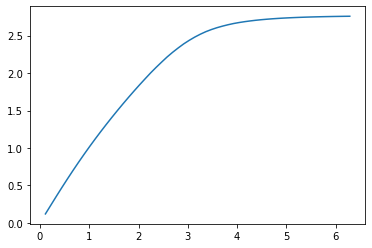

In [4]:
##Loop variables 
theta = phi0 
dt = Targets[k]-phi0
i1 = phi0 
i0 = 0 
Thetas=[]
p = n

if(dt<e): 
    Thetas.append(phi0)
    k+=1
    dt = Targets[k]-phi0
    p-=1

targets = [2*(j+k)*np.pi/n for j in range(p)] # adjust the 0-2pi passage


##Loop

for j in range(p):
    target = targets[j]
    h1 = list_step[j]
    h2 = 2*h1
    print("cible :", target)
    theta += dt

    while(abs(target-i1)>e):
        if(theta<2): #compute the whole geodesic
            impact1=tir(h1,theta)
            impact2=tir(h2,theta)
            i0=i1
            i1=2*impact1-impact2
            dt = dt*(target-i1)/(i1-i0) 
            theta+=dt
                
        else: # symmetries!
            r1 = [r0]
            dr1 = [-(1/r1[0])*np.tan(theta-np.pi/2-phi0)]
            phi1 = [phi0]
            r2 = [r0]
            dr2 = [-(1/r2[0])*np.tan(theta-np.pi/2-phi0)]
            phi2 = [phi0]
            
            # shoot two geodesics with different steps
            
            i=0
            while(r1[i]>1.4 and dr1[i]<0):
                a = np.array([dr1[i],r1[i],phi1[i]])
                a1 = g2(a) * h1
                a2 = g2(a + a1) * h1
                a3 = g2(a + a2/2) * h1
                a4 = g2(a + a3) * h1
                a = a + (a1 + 2 * (a2 + a3) + a4)/6
                dr1.append(a[0])
                r1.append(a[1])
                phi1.append(a[2])
                i+=1
            
            i=0
            while(r2[i]>1.4 and dr2[i]<0):
                a = np.array([dr2[i],r2[i],phi2[i]])
                a1 = g2(a) * h2
                a2 = g2(a + a1) * h2
                a3 = g2(a + a2/2) * h2
                a4 = g2(a + a3) * h2
                a = a + (a1 + 2 * (a2 + a3) + a4)/6
                dr2.append(a[0])
                r2.append(a[1])
                phi2.append(a[2])
                i+=1
            
            if(r1[-1]<=1.4 or r2[-1]<=1.4):
                dt = -abs(dt)/2
                theta += dt
                
            #Assemble the two
            
            else:
                z = dr1[-2]/(dr1[-2]-dr1[-1])
                phi1 = z*phi1[-1]+(1-z)*phi1[-2]
                
                z = dr2[-2]/(dr2[-2]-dr2[-1])
                phi2 = z*phi2[-1]+(1-z)*phi2[-2]
                
                phi3 = 2*phi1-phi2
                phi4 = 2*phi3-phi0
                
                t = np.pi-theta
                u = 0
                while(t>Thetas[u] and u<len(Thetas)-2):
                    u+=1
                z = (t-Thetas[u])/(Thetas[u+1]-Thetas[u])
                
                i0 = i1
                i1 = phi4+targets[u]+z*(targets[u+1]-targets[u])-phi0
                
                dt = dt*(target-i1)/(i1-i0) 
                theta+=dt
        
    Thetas.append(theta)
    print("target rached, apparent angle: ",theta)
    if(len(Thetas)>1):
        dt = Thetas[-1]-Thetas[-2]
    else: 
        dt = 2*np.pi/n

##Final Plot
plt.plot(targets, Thetas)

In [19]:
print(targets) #phi_infini #coordonnée de Schwarzschild des étoiles
print(Thetas) #ksi #angles_apparents

[0.12566370614359174, 0.25132741228718347, 0.37699111843077515, 0.5026548245743669, 0.6283185307179586, 0.7539822368615503, 0.8796459430051421, 1.0053096491487339, 1.1309733552923256, 1.2566370614359172, 1.382300767579509, 1.5079644737231006, 1.6336281798666925, 1.7592918860102842, 1.8849555921538756, 2.0106192982974678, 2.1362830044410597, 2.261946710584651, 2.3876104167282426, 2.5132741228718345, 2.6389378290154264, 2.764601535159018, 2.8902652413026093, 3.015928947446201, 3.141592653589793, 3.267256359733385, 3.3929200658769765, 3.5185837720205684, 3.6442474781641603, 3.7699111843077513, 3.895574890451343, 4.0212385965949355, 4.1469023027385274, 4.272566008882119, 4.39822971502571, 4.523893421169302, 4.649557127312894, 4.775220833456485, 4.900884539600077, 5.026548245743669, 5.15221195188726, 5.277875658030853, 5.403539364174444, 5.529203070318036, 5.654866776461628, 5.780530482605219, 5.906194188748811, 6.031857894892402, 6.157521601035994, 6.283185307179586]
[0.1533383327260466, 0

## Frequency shift

In [20]:
import colorsys 

def frequency_to_rgb(frequency, gamma=0.8):
  
    c = 299792458
    wavelength = c * 10**9 / frequency
    
    
    if wavelength >= 380 and wavelength <= 440:
        attenuation = 0.3 + 0.7 * (wavelength - 380) / (440 - 380)
        R = ((-(wavelength - 440) / (440 - 380)) * attenuation) ** gamma
        G = 0.0
        B = (1.0 * attenuation) ** gamma
    elif wavelength >= 440 and wavelength <= 490:
        R = 0.0
        G = ((wavelength - 440) / (490 - 440)) ** gamma
        B = 1.0
    elif wavelength >= 490 and wavelength <= 510:
        R = 0.0
        G = 1.0
        B = (-(wavelength - 510) / (510 - 490)) ** gamma
    elif wavelength >= 510 and wavelength <= 580:
        R = ((wavelength - 510) / (580 - 510)) ** gamma
        G = 1.0
        B = 0.0
    elif wavelength >= 580 and wavelength <= 645:
        R = 1.0
        G = (-(wavelength - 645) / (645 - 580)) ** gamma
        B = 0.0
    elif wavelength >= 645 and wavelength <= 750:
        attenuation = 0.3 + 0.7 * (750 - wavelength) / (750 - 645)
        R = (1.0 * attenuation) ** gamma
        G = 0.0
        B = 0.0
    else:
        R = 0.0
        G = 0.0
        B = 0.0
    #R = int(R * 255)
    #G = int(G * 255)
    #B = int(B * 255)
    return (R, G, B)


  
def modify_brightness(rgb, l):
    hls = list(colorsys.rgb_to_hls(rgb[0], rgb[1], rgb[2]))
    hls[1] = l
    return colorsys.hls_to_rgb(hls[0], hls[1], hls[2])

def gravitational_shift(star_frequency, r_star, r_obs): #for a static observer
    return star_frequency * ((1 - 1 / r_star) / (1 - 1 / r_obs)) ** .5

def ff_shift(star_frequency, r_star, r_obs, theta, r_init): #for a free falling observer, r_init: initial position of the observer, theta: apparent angle of the star 
    return star_frequency * (1 - 1 / r_star)**.5 / ((1 - 1 / r_init) ** .5 - np.cos(theta) * (1 / r_obs - 1 / r_init) ** .5)


  

## 3D Sky

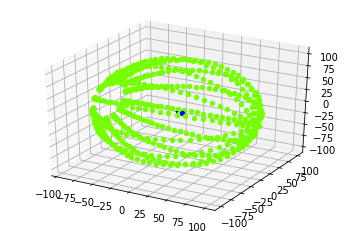

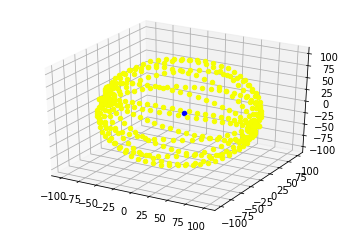

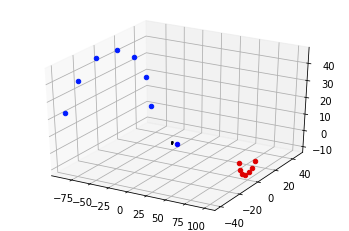

In [5]:
# tested and gave nice results for sky radius R = 100, initial position of the 
# observer r_init = 10, intervalle = 2, and r0 varying from 10 to 1.7

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import colorsys 

##Frequency RGB conversion

def frequency_to_rgb(frequency, gamma=0.8):
  
    c = 299792458
    wavelength = c * 10**9 / frequency
    
    
    if wavelength >= 380 and wavelength <= 440:
        attenuation = 0.3 + 0.7 * (wavelength - 380) / (440 - 380)
        R = ((-(wavelength - 440) / (440 - 380)) * attenuation) ** gamma
        G = 0.0
        B = (1.0 * attenuation) ** gamma
    elif wavelength >= 440 and wavelength <= 490:
        R = 0.0
        G = ((wavelength - 440) / (490 - 440)) ** gamma
        B = 1.0
    elif wavelength >= 490 and wavelength <= 510:
        R = 0.0
        G = 1.0
        B = (-(wavelength - 510) / (510 - 490)) ** gamma
    elif wavelength >= 510 and wavelength <= 580:
        R = ((wavelength - 510) / (580 - 510)) ** gamma
        G = 1.0
        B = 0.0
    elif wavelength >= 580 and wavelength <= 645:
        R = 1.0
        G = (-(wavelength - 645) / (645 - 580)) ** gamma
        B = 0.0
    elif wavelength >= 645 and wavelength <= 750:
        attenuation = 0.3 + 0.7 * (750 - wavelength) / (750 - 645)
        R = (1.0 * attenuation) ** gamma
        G = 0.0
        B = 0.0
    else:
        R = 0.0
        G = 0.0
        B = 0.0
    #R *= 255
    #G *= 255
    #B *= 255
    return [R, G, B]


##Frequency shift

def gravitational_shift(star_frequency, r_star, r_obs): #for a static observer
    return star_frequency * ((1 - 1 / r_star) / (1 - 1 / r_obs)) ** .5

def ff_shift(star_frequency, r_star, r_obs, theta, r_init): #for a free falling observer, r_init: initial position of the observer, theta: apparent angle of the star (cf. PDF, formule revérifiée à la main)
    return star_frequency * (1 - 1 / r_star)**.5 / ((1 - 1 / r_init) ** .5 - np.cos(theta) * (1 / r_obs - 1 / r_init) ** .5)

##Second image

def sym_star(targ, i_star): #returns the index of the symmetric star in targ

    targ2 = targ
  
    for i in range(len(targ)): #makes all targ values between 0 and 2pi
        while targ2[i]  > 2 * np.pi:
            targ2[i] += - 2 * np.pi
  
    sym_angle = 2 * np.pi - targ2[i_star]
  
    m = abs(targ2[0] - sym_angle)
    i_sym = 0
  
    for i in range(1, len(targ)):
        if abs(sym_angle - targ2[i]) < m :
            m = sym_angle - targ2[i]
            i_sym = i    
    
    return i_sym

##plot
f = 520 * 10**12 #orange stars w/o BH

r_init = 10 #initial position of the observer from where it starts ff

init_col = frequency_to_rgb(f)


fig = plt.figure(100)
ax = fig.add_subplot(111, projection='3d')

fig2 = plt.figure(200)
ax2 = fig2.add_subplot(111, projection='3d')

fig3 = plt.figure(300)
ax3 = fig3.add_subplot(111, projection='3d')


rk = e * 25

m_eps = int(np.pi / rk)

eps = [j * rk for j in range(m_eps)]

Thetas_2 = [2 * np.pi - Thetas[sym_star(targets, i)] for i in range(n)]

#Static observer

X1s = np.zeros((m_eps,n))
Y1s = np.zeros((m_eps,n))
Z1s = np.zeros((m_eps,n))

X2s = np.zeros((m_eps,n))
Y2s = np.zeros((m_eps,n))
Z2s = np.zeros((m_eps,n))

col = frequency_to_rgb(gravitational_shift(f, R, r0))

for i in range(m_eps):
    for j in range(n):
    
        X1s[i][j] = R * np.cos(Thetas[j])
        Y1s[i][j] = R * np.cos(eps[i]) * np.sin(Thetas[j])
        Z1s[i][j] = R * np.sin(eps[i]) * np.sin(Thetas[j])
    
        X2s[i][j] = R * np.cos(Thetas_2[j])
        Y2s[i][j] = R * np.cos(eps[i]) * np.sin(Thetas_2[j])
        Z2s[i][j] = R * np.sin(eps[i]) * np.sin(Thetas_2[j])
    
    
        ax.scatter(X1s[i][j], Y1s[i][j], Z1s[i][j], c=[col])
        ax.scatter(X2s[i][j], Y2s[i][j], Z2s[i][j], c=[col])

#observer w/o BH

X = np.zeros((m_eps,n))
Y = np.zeros((m_eps,n))
Z = np.zeros((m_eps,n))

for i in range(m_eps):
    for j in range(n):
        X[i][j] = R * np.cos(targets[j])
        Y[i][j] = R * np.cos(eps[i]) * np.sin(targets[j])
        Z[i][j] = R * np.sin(eps[i]) * np.sin(targets[j])   
        ax2.scatter(X[i][j], Y[i][j], Z[i][j], c=[init_col])

#free falling observer

X1ff = np.zeros((m_eps,n))
Y1ff = np.zeros((m_eps,n))
Z1ff = np.zeros((m_eps,n))

X2ff = np.zeros((m_eps,n))
Y2ff = np.zeros((m_eps,n))
Z2ff = np.zeros((m_eps,n))

beta = np.sqrt((1 / r0 - 1 / r_init) / (1 - 1 / r_init))

Thetas_ff = [0 for i in range(n)]
Thetas_2_ff = [0 for i in range(n)]

for j in range(n):
    Thetas_ff[j] = np.arccos((np.cos(Thetas[j]) + beta) / (1 + beta * np.cos(Thetas[j])))
    Thetas_2_ff[j] = - np.arccos((np.cos(Thetas_2[j]) + beta) / (1 + beta * np.cos(Thetas_2[j])))

for i in range(m_eps):
    for j in range(n):
    
        X1ff[i][j] = R * np.cos(Thetas_ff[j])
        Y1ff[i][j] = R * np.cos(eps[i]) * np.sin(Thetas_ff[j])
        Z1ff[i][j] = R * np.sin(eps[i]) * np.sin(Thetas_ff[j])
    
        X2ff[i][j] = R * np.cos(Thetas_2_ff[j])
        Y2ff[i][j] = R * np.cos(eps[i]) * np.sin(Thetas_2_ff[j])
        Z2ff[i][j] = R * np.sin(eps[i]) * np.sin(Thetas_2_ff[j])
    
    
    ax3.scatter(X1ff[i][j], Y1ff[i][j], Z1ff[i][j], c=[frequency_to_rgb(ff_shift(f, R, r0, np.pi - Thetas_ff[j], r_init))])
    ax3.scatter(X2ff[i][j], Y2ff[i][j], Z2ff[i][j], c=[frequency_to_rgb(ff_shift(f, R, r0, np.pi - Thetas_2_ff[j], r_init))])

ax2.scatter(x[0], x[1], 0, c='b')
ax3.scatter(x[0], x[1], 0, c='b')
ax.scatter(x[0], x[1], 0, c='b')

# Schwarzschild sphere
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
a = 1 * np.outer(np.cos(u), np.sin(v))
b = 1 * np.outer(np.sin(u), np.sin(v))
c = 1 * np.outer(np.ones(np.size(u)), np.cos(v))

ax.plot_surface(a, b, c, color='k')
ax3.plot_surface(a, b, c, color='k')

plt.show()

# Distortion of a star passing behind a black hole

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import os
from matplotlib import animation
from IPython.display import HTML


n=50
R = 0.1
interval = 50
nb_img = 200
m = 50


targets = [0.12566370614359174, 0.25132741228718347, 0.37699111843077515, 0.5026548245743669, 0.6283185307179586, 0.7539822368615503, 0.8796459430051421, 1.0053096491487339, 1.1309733552923256, 1.2566370614359172, 1.382300767579509, 1.5079644737231006, 1.6336281798666925, 1.7592918860102842, 1.8849555921538756, 2.0106192982974678, 2.1362830044410597, 2.261946710584651, 2.3876104167282426, 2.5132741228718345, 2.6389378290154264, 2.764601535159018, 2.8902652413026093, 3.015928947446201, 3.141592653589793, 3.267256359733385, 3.3929200658769765, 3.5185837720205684, 3.6442474781641603, 3.7699111843077513, 3.895574890451343, 4.0212385965949355, 4.1469023027385274, 4.272566008882119, 4.39822971502571, 4.523893421169302, 4.649557127312894, 4.775220833456485, 4.900884539600077, 5.026548245743669, 5.15221195188726, 5.277875658030853, 5.403539364174444, 5.529203070318036, 5.654866776461628, 5.780530482605219, 5.906194188748811, 6.031857894892402, 6.157521601035994, 6.283185307179586]
Thetas = [0.1533383327260466, 0.2977806731019223, 0.43979662107293127, 0.5757838882438855, 0.7054486633648681, 0.8281791378505737, 0.94380171251392, 1.0529323721918455, 1.1558485144264814, 1.2530902173392207, 1.3452095068091061, 1.4326663314183228, 1.5158799320613652, 1.5951586048088342, 1.6707087269834657, 1.7426416567520524, 1.8109683346817533, 1.8756329516522492, 1.936510526671423, 1.9934515973715068, 2.0475724433978058, 2.0948654509074225, 2.140190500506905, 2.1813596150728407, 2.2162659989122284, 2.2488120075322304, 2.277319084952066, 2.3026816229460927, 2.3241956629286413, 2.3435340529254303, 2.3605759949788574, 2.3753267535502762, 2.3881668350046197, 2.399332117257361, 2.4090381766260047, 2.417480468341877, 2.424803619120792, 2.431199797206482, 2.436454036400659, 2.441326035895722, 2.4456339877763864, 2.449211343328502, 2.452455426017202, 2.455267360839482, 2.4577771207241303, 2.4599837059251053, 2.4618271430731884, 2.4635038189668377, 2.4649867944646036, 2.4662843848133544]

def aux(d):
    alpha=[]
    if(abs(d)>R):
        t_max = np.arcsin(R/d)
        for i in range(-m,m):
            t = (2*i+1)*t_max/(2*m)
            alpha.append(t+np.arcsin(d*np.sin(t)/R))
        for i in range(-m,m):
            t = (2*(-i-1)+1)*t_max/(2*m)
            alpha.append(t+np.pi-np.arcsin(d*np.sin(t)/R))
    else:
        t_max = np.pi/2
        for i in range(-m,m):
            t = (2*i+1)*t_max/(2*m)
            alpha.append(t+np.arcsin(d*np.sin(t)/R))
        for i in range(-m,m):
            t = (2*i+1)*t_max/(2*m)
            alpha.append(t+np.pi-np.arcsin(d*np.sin(t)/R))
            
    theta = [np.arctan2(R*np.sin(a),d+R*np.cos(a)) for a in alpha]
    phi = [np.sqrt((d+R*np.cos(a))**2+(R*np.sin(a))**2) for a in alpha]
            
    ksi1=[]
    ksi2=[]
    i=0
    while(i<4*m):
        p1 = np.pi-phi[i]
        p2 = np.pi+phi[i]
        j1=int(n*p1/(2*np.pi))
        j2=int(n*p2/(2*np.pi))
        b1=(n*p1/(2*np.pi))%1
        b2=(n*p2/(2*np.pi))%1
        ksi1.append((1-b1)*Thetas[j1+1]+b1*Thetas[j1+2])
        ksi2.append((1-b2)*Thetas[j2+1]+b2*Thetas[j2+2])
        i+=1

    #x=[phi[i]*np.cos(theta[i]) for i in range(4*m)]
    #y=[phi[i]*np.sin(theta[i]) for i in range(4*m)]
    x1=[(np.pi-ksi1[i])*np.cos(theta[i]) for i in range(4*m)]
    x1.append(x1[0])
    y1=[(np.pi-ksi1[i])*np.sin(theta[i]) for i in range(4*m)]
    y1.append(y1[0])
    x2=[(np.pi-ksi2[i])*np.cos(np.pi+theta[i]) for i in range(4*m)]
    x2.append(x2[0])
    y2=[(np.pi-ksi2[i])*np.sin(np.pi+theta[i]) for i in range(4*m)]
    y2.append(y2[0])

        
    return(x1,y1,x2,y2)
'''
fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-2, 2), ylim=(-1.2, 1.2))
line1, = ax.plot([], [], 'r-',lw=2)
line2, = ax.plot([], [], 'r-',lw=2)
#line3, = ax.plot([], [], 'r-',lw=2)
circle = plt.Circle((0,0),np.pi-Thetas[-1],color='k')
ax.add_artist(circle)
'''

def init():
    line1.set_data([], [])
    line2.set_data([], [])
    #line3.set_data([], [])
    return line1,line2,

def animate(j):
    d = 2.2*(1-(2*j-1)/nb_img)
    (x1,y1,x2,y2)=aux(d)
    line1.set_data(x1, y1)
    line2.set_data(x2, y2)
    #line3.set_data(x, y)
    return line1,line2,

ani = animation.FuncAnimation(fig, animate, np.arange(0, nb_img),
                               interval=interval, repeat=True, blit=False, init_func=init)
                               
HTML(ani.to_jshtml())
